# Libraries:

In [1]:
import numpy as np
import numba as nb
from numba import njit, jit
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors
import time
from tqdm import tqdm
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# Important functions:

In [76]:
# RK4 Integration Routine
def RK4(f, N, x0, h, tmax):
    t_values = np.arange(0, tmax, h)
    Xt = np.zeros((N, len(t_values)))
    Xt[:, 0] = x0
    for i in range(len(t_values) - 1):
        k1 = h * np.array(f(0, Xt[:, i]))
        k2 = h * np.array(f(0, Xt[:, i] + 0.5 * k1))
        k3 = h * np.array(f(0, Xt[:, i] + 0.5 * k2))
        k4 = h * np.array(f(0, Xt[:, i] + k3))
        Xt[:, i + 1] = Xt[:, i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return Xt

# Function to integrate trajectories using RK4
def integrate_trajectory1(x0, y0, t_max=10, h=0.01, include_label=False):
    Xt = RK4(system1, 2, np.array([x0, y0]), h, t_max)
    if (include_label):
        ax1.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)
    else:
        ax1.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)

def integrate_trajectory2(x0, y0, t_max=10, h=0.01, include_label=False):
    Xt = RK4(system2, 2, np.array([x0, y0]), h, t_max)
    if (include_label):
        ax2.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)
    else:
        ax2.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)

def integrate_trajectory3(x0, y0, t_max=10, h=0.01, include_label=False):
    Xt = RK4(system3, 2, np.array([x0, y0]), h, t_max)
    if (include_label):
        ax3.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)
    else:
        ax3.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)

def integrate_trajectory4(x0, y0, t_max=10, h=0.01, include_label=False):
    Xt = RK4(system3, 2, np.array([x0, y0]), h, t_max)
    if (include_label):
        ax4.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)
    else:
        ax4.plot(Xt[0], Xt[1], 'b', lw=2, alpha=0.8)

# Example 1: Van der Pol Oscillator:

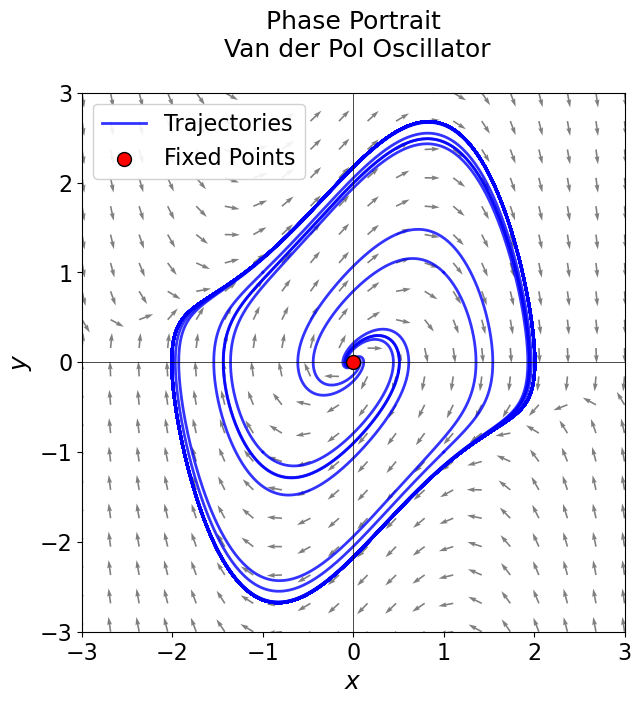

In [5]:
# Parameters for visualization:-----------------------------------------------------

# These are the things you have to change in each case...

# Define the system of equations
def system(t, state):
    x, y = state
    dx = y
    dy = (1-x**2)*y-x
    return np.array([dx, dy])


# Window where we are going to plot the vector field:
xmin = -3
xmax = 3
ymin = -3
ymax = 3
npoints = 20 #Number of points for the vector field.
# Initial conditions
initial_conditions = [(1, 1), (0.5, 0.1), (0.5,-0.1), (1, -1), (-1, 1), (-1, -1)]



# Define fixed points
fixed_points = np.array([
    [0, 0]
])
#------------------------------------------------------------------------------------


# Create a grid for the vector field
x_vals = np.linspace(xmin, xmax, npoints)
y_vals = np.linspace(ymin, ymax, npoints)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute normalized vector field
U, V = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u, v = system(0, [X[i, j], Y[i, j]])
        norm = np.sqrt(u**2 + v**2)  # Normalize vector field
        if norm != 0:
            U[i, j], V[i, j] = u / norm, v / norm




# Create figure
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the normalized vector field
ax.quiver(X, Y, U, V, color="k", alpha=0.5, zorder=0)

# Plot trajectories from different initial conditions
k=0
for x0, y0 in initial_conditions:
    if (k==0):
            integrate_trajectory(x0, y0, t_max=100, h=0.01, include_label=True)
            integrate_trajectory(x0, y0, t_max=-100, h=-0.01)
    else:
            integrate_trajectory(x0, y0, t_max=100, h=0.01)
            integrate_trajectory(x0, y0, t_max=-100, h=-0.01)

    k+=1

# Plot fixed points
ax.scatter(fixed_points[:, 0], fixed_points[:, 1], color="red", s=100, label="Fixed Points", edgecolors="black", zorder=10)
plt.gca().lines
# Set labels and grid
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_title("Phase Portrait\n Van der Pol Oscillator\n", fontsize=18)
ax.axhline(0, color="black", lw=0.5)
ax.axvline(0, color="black", lw=0.5)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(fontsize=16, framealpha=0.9)
ax.tick_params(axis="both", labelsize=16)

plt.show()

# Example 2:

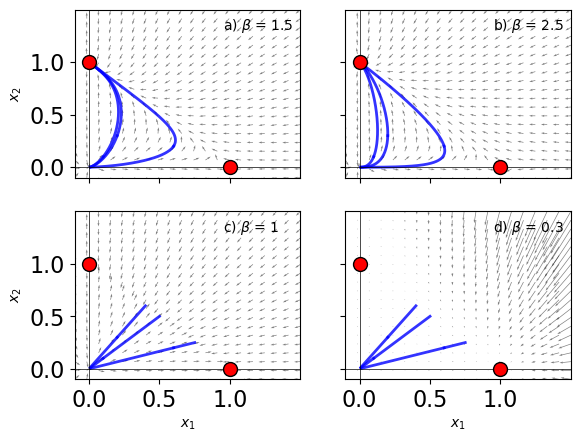

In [94]:
# Parameters for visualization:-----------------------------------------------------

# These are the things you have to change in each case...

b1 = 1.5
b2 = 2.5
b3 = 1
b4 = 0.3

# Define the system of equations
def system1(t, state):
    x, y = state
    dx = x**2 - x**3 - b1*x**2*y
    dy = b1*x*y - x**2*y - b1*x*y**2
    return np.array([dx, dy])
#####################################################################################################
def system2(t, state):
    x, y = state
    dx = x**2 - x**3 - b2*x**2*y
    dy = b2*x*y - x**2*y - b2*x*y**2
    return np.array([dx, dy])
#####################################################################################################
def system3(t, state):
    x, y = state
    dx = x**2 - x**3 - b3*x**2*y
    dy = b3*x*y - x**2*y - b3*x*y**2
    return np.array([dx, dy])
#####################################################################################################
def system4(t, state):
    x, y = state
    dx = x**2 - x**3 - b4*x**2*y
    dy = b4*x*y - x**2*y - b4*x*y**2
    return np.array([dx, dy])
#####################################################################################################

# Window where we are going to plot the vector field:
xmin = -0.1
xmax = 1.5
ymin = -0.1
ymax = 1.5
npoints = 20 #Number of points for the vector field.
# Plot trajectories from different initial conditions
initial_conditions1 = [(0.2, 0.3), (0.6,0.2), (0.1, 0.1)]
initial_conditions2 = [(0.2, 0.3), (0.6,0.2), (0.1, 0.1)]
initial_conditions3 = [(0.2, 0.3), (0.6,0.2), (0.1, 0.1)]
initial_conditions4 = [(0.2, 0.3), (0.6,0.2), (0.1, 0.1)]


# Define fixed points
fixed_points = np.array([
    [0, 1], [1, 0]
])
#------------------------------------------------------------------------------------


# Create a grid for the vector field
x_vals = np.linspace(xmin, xmax, npoints)
y_vals = np.linspace(ymin, ymax, npoints)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute normalized vector field
U1, V1 = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u1, v1 = system1(0, [X[i, j], Y[i, j]])
        norm = np.sqrt(u1**2 + v1**2)  # Normalize vector field
        if norm != 0:
            U1[i, j], V1[i, j] = u1 / norm, v1 / norm
#####################################################################################################
U2, V2 = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u2, v2 = system2(0, [X[i, j], Y[i, j]])
        norm = np.sqrt(u2**2 + v2**2)  # Normalize vector field
        if norm != 0:
            U2[i, j], V2[i, j] = u2 / norm, v2 / norm
#####################################################################################################
U3, V3 = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u3, v3 = system3(0, [X[i, j], Y[i, j]])
        norm = np.sqrt(u3**2 + v3**2)  # Normalize vector field
        if norm != 0:
            U3[i, j], V3[i, j] = u3 / norm, v3 / norm
#####################################################################################################
U4, V4 = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        u4, v4 = system4(0, [X[i, j], Y[i, j]])
        norm4 = np.sqrt(u4**2 + v4**2)  # Normalize vector field
        if norm != 0:
            U4[i, j], V4[i, j] = u4 / norm, v4 / norm
#####################################################################################################



# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Plot the normalized vector field
ax1.quiver(X, Y, U1, V1, color="k", alpha=0.5, zorder=0)
ax2.quiver(X, Y, U2, V2, color="k", alpha=0.5, zorder=0)
ax3.quiver(X, Y, U3, V3, color="k", alpha=0.5, zorder=0)
ax4.quiver(X, Y, U4, V4, color="k", alpha=0.5, zorder=0)

# Plot trajectories from different initial conditions
k=0
for x0, y0 in initial_conditions1:
    if (k==0):
            integrate_trajectory1(x0, y0, t_max=100, h=0.01, include_label=True)
            integrate_trajectory1(x0, y0, t_max=-100, h=-0.01)
    else:
            integrate_trajectory1(x0, y0, t_max=100, h=0.01)
            integrate_trajectory1(x0, y0, t_max=-100, h=-0.01)

    k+=1
#####################################################################################################
k=0
for x0, y0 in initial_conditions2:
    if (k==0):
            integrate_trajectory2(x0, y0, t_max=100, h=0.01, include_label=True)
            integrate_trajectory2(x0, y0, t_max=-100, h=-0.01)
    else:
            integrate_trajectory2(x0, y0, t_max=100, h=0.01)
            integrate_trajectory2(x0, y0, t_max=-100, h=-0.01)

    k+=1
#####################################################################################################
k=0
for x0, y0 in initial_conditions3:
    if (k==0):
            integrate_trajectory3(x0, y0, t_max=100, h=0.01, include_label=True)
            integrate_trajectory3(x0, y0, t_max=-100, h=-0.01)
    else:
            integrate_trajectory3(x0, y0, t_max=100, h=0.01)
            integrate_trajectory3(x0, y0, t_max=-100, h=-0.01)

    k+=1
#####################################################################################################3
k=0
for x0, y0 in initial_conditions4:
    if (k==0):
            integrate_trajectory4(x0, y0, t_max=100, h=0.01, include_label=True)
            integrate_trajectory4(x0, y0, t_max=-100, h=-0.01)
    else:
            integrate_trajectory4(x0, y0, t_max=100, h=0.01)
            integrate_trajectory4(x0, y0, t_max=-100, h=-0.01)

    k+=1
#####################################################################################################

# Plot fixed points
ax1.scatter(fixed_points[:, 0], fixed_points[:, 1], color="red", s=100, edgecolors="black", zorder=10)
ax2.scatter(fixed_points[:, 0], fixed_points[:, 1], color="red", s=100, edgecolors="black", zorder=10)
ax3.scatter(fixed_points[:, 0], fixed_points[:, 1], color="red", s=100, edgecolors="black", zorder=10)
ax4.scatter(fixed_points[:, 0], fixed_points[:, 1], color="red", s=100, edgecolors="black", zorder=10)

plt.gca().lines
#fig.suptitle('Phase portrait')
# Set labels and grid
#ax.set_xlabel("$x$", fontsize=18)
#ax.set_ylabel("$y$", fontsize=18)
#ax.set_title("Phase Portrait", fontsize=18)
ax1.axhline(0, color="black", lw=0.5)
ax1.axvline(0, color="black", lw=0.5)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_yticks([0,0.5,1])
ax1.set_xticks([0,0.5,1])
ax1.set_ylabel(r'$x_2$')
#ax1.legend(fontsize=16, framealpha=0.9)
ax1.tick_params(axis="both", labelsize=16)
ax1.text(0.95, 1.31, rf'a) $\beta$ = {b1}')
######################################################################################################
ax2.axhline(0, color="black", lw=0.5)
ax2.axvline(0, color="black", lw=0.5)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_yticks([0,0.5,1])
ax2.set_xticks([0,0.5,1])
#ax2.legend(fontsize=16, framealpha=0.9)
ax2.tick_params(axis="both", labelsize=16)
ax2.text(0.95, 1.31, rf'b) $\beta$ = {b2}')
######################################################################################################
ax3.axhline(0, color="black", lw=0.5)
ax3.axvline(0, color="black", lw=0.5)
ax3.set_xlim(xmin, xmax)
ax3.set_yticks([0,0.5,1])
ax3.set_xticks([0,0.5,1])
ax3.set_ylim(ymin, ymax)
ax3.set_ylabel(r'$x_2$')
ax3.set_xlabel(r'$x_1$')
#ax3.legend(fontsize=16, framealpha=0.9)
ax3.tick_params(axis="both", labelsize=16)
ax3.text(0.95, 1.31, rf'c) $\beta$ = {b3}')
######################################################################################################
ax4.axhline(0, color="black", lw=0.5)
ax4.axvline(0, color="black", lw=0.5)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(ymin, ymax)
ax4.set_yticks([0,0.5,1])
ax4.set_xticks([0,0.5,1])
ax4.set_xlabel(r'$x_1$')
#ax4.legend(fontsize=16, framealpha=0.9)
ax4.tick_params(axis="both", labelsize=16)
ax4.text(0.95, 1.31, rf'd) $\beta$ = {b4}')
######################################################################################################
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('diagrama.pdf')
plt.show()